### Breast Cancer 

In [1]:
from sklearn.datasets import load_breast_cancer


bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

### Dataset Info

In [2]:
bc.target[20]

np.int64(1)

In [3]:
bc.target.shape

(569,)

In [4]:
bc.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30))

In [5]:
bc.data.shape

(569, 30)

### Preprocessing

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [7]:
print(f'Feature=> train: {x_train.shape} - test: {x_test.shape}')
print(f'Label=> train: {y_train.shape} - test: {y_test.shape}')

Feature=> train: (455, 30) - test: (114, 30)
Label=> train: (455,) - test: (114,)


In [8]:
x_train[0]

array([1.246e+01, 2.404e+01, 8.397e+01, 4.759e+02, 1.186e-01, 2.396e-01,
       2.273e-01, 8.543e-02, 2.030e-01, 8.243e-02, 2.976e-01, 1.599e+00,
       2.039e+00, 2.394e+01, 7.149e-03, 7.217e-02, 7.743e-02, 1.432e-02,
       1.789e-02, 1.008e-02, 1.509e+01, 4.068e+01, 9.765e+01, 7.114e+02,
       1.853e-01, 1.058e+00, 1.105e+00, 2.210e-01, 4.366e-01, 2.075e-01])

In [9]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
x_train[0]

array([0.25931185, 0.48461278, 0.27765877, 0.14099682, 0.59555836,
       0.67548003, 0.53256795, 0.42460239, 0.46075814, 0.68386689,
       0.06739091, 0.27378006, 0.06040616, 0.03123902, 0.18479111,
       0.52511491, 0.1955303 , 0.2712635 , 0.14082287, 0.31733068,
       0.25471363, 0.81559476, 0.23527068, 0.1293256 , 0.75368157,
       1.        , 0.88258786, 0.75945017, 0.55213877, 1.        ])

### Classification

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f'acc_train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}')

    return acc_train, acc_test, p, r

#### 1. Naive bayes

In [12]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [13]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9428571428571428 - acc test: 0.9210526315789473 - precision: 0.8904109589041096 - recall: 0.9848484848484849


### 2. KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [15]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9758241758241758 - acc test: 0.9649122807017544 - precision: 0.9428571428571428 - recall: 1.0


### 3. Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(max_depth=32, min_samples_split=4, criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=32, min_samples_split=4)

In [17]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9978021978021978 - acc test: 0.9298245614035088 - precision: 0.9142857142857143 - recall: 0.9696969696969697


### 4. Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [19]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_dt, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9956043956043956 - acc test: 0.9385964912280702 - precision: 0.927536231884058 - recall: 0.9696969696969697


### 5. SVM

In [20]:
from sklearn.svm import SVC


svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [21]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.989010989010989 - acc test: 0.956140350877193 - precision: 0.9420289855072463 - recall: 0.9848484848484849


### 6. Logistic Regression

In [22]:
# from sklearn.linear_model import LogisticRegression


# lr = LogisticRegression()
# lr.fit(x_train, y_train)

In [23]:
# y_pred_train = lr.predict(x_train)
# y_pred_test = lr.predict(x_test)

# acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

### 7. ANN

In [24]:
# from sklearn.neural_network import MLPClassifier


# ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam')
# ann.fit(x_train, y_train)

In [25]:
# y_pred_train = ann.predict(x_train)
# y_pred_test = ann.predict(x_test)

# acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

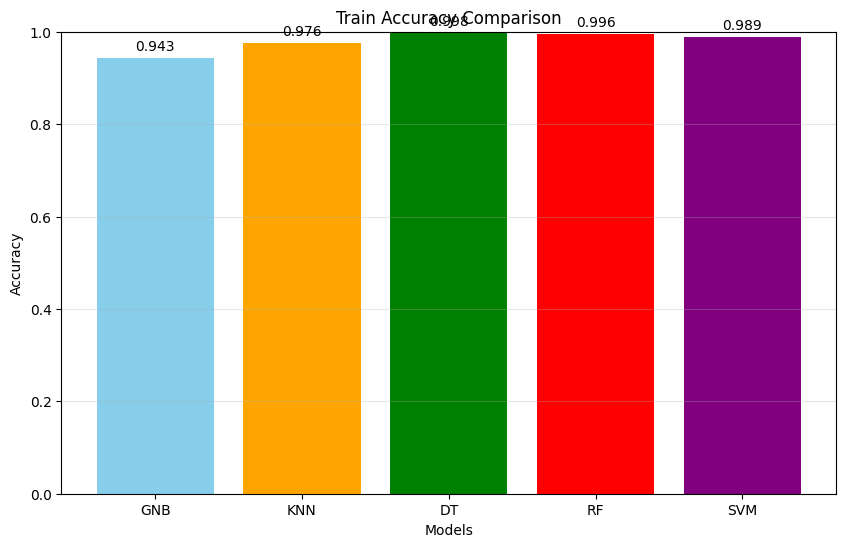

In [26]:
import matplotlib.pyplot as plt


acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM']

colors = ['skyblue', 'orange', 'green', 'red', 'purple']
plt.figure(figsize=(10, 6))
plt.title('Train Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.bar(title, acc_train, color=colors)
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1)

# Add accuracy values on top of bars
for i, v in enumerate(acc_train):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
plt.show()

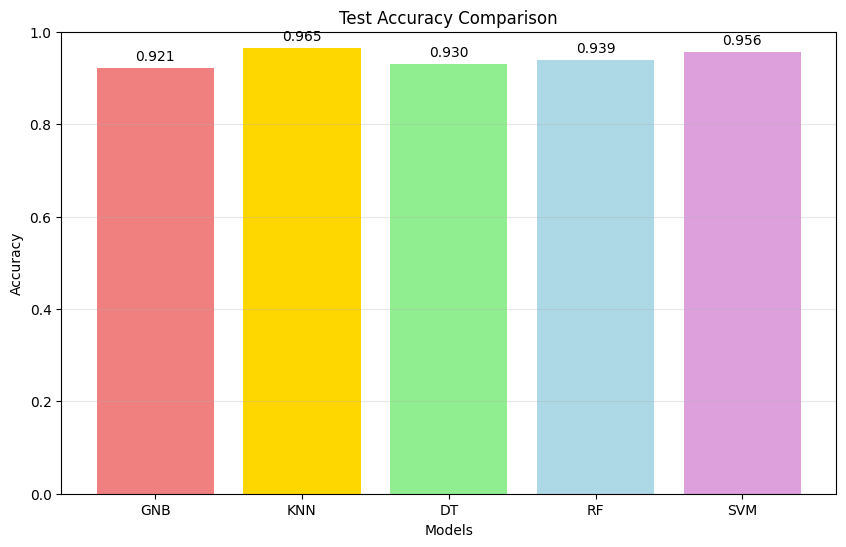

In [27]:
# Test Accuracy Comparison
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM']

colors = ['lightcoral', 'gold', 'lightgreen', 'lightblue', 'plum']
plt.figure(figsize=(10, 6))
plt.bar(title, acc_test, color=colors)
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1)

# Add accuracy values on top of bars
for i, v in enumerate(acc_test):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.show()

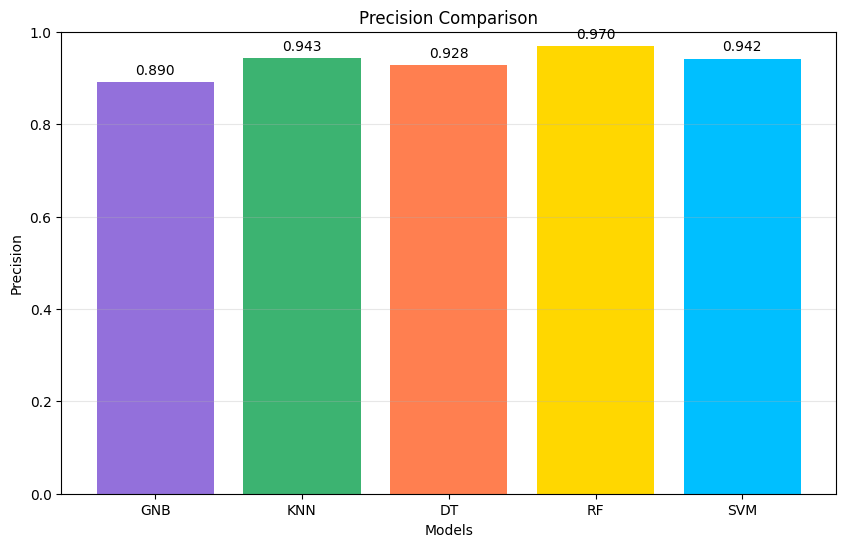

In [28]:
# Precision Comparison
precision_scores = [p_gnb, p_knn, p_dt, r_rf, p_svm]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM']

colors = ['mediumpurple', 'mediumseagreen', 'coral', 'gold', 'deepskyblue']
plt.figure(figsize=(10, 6))
plt.bar(title, precision_scores, color=colors)
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.xlabel('Models')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1)

# Add precision values on top of bars
for i, v in enumerate(precision_scores):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.show()

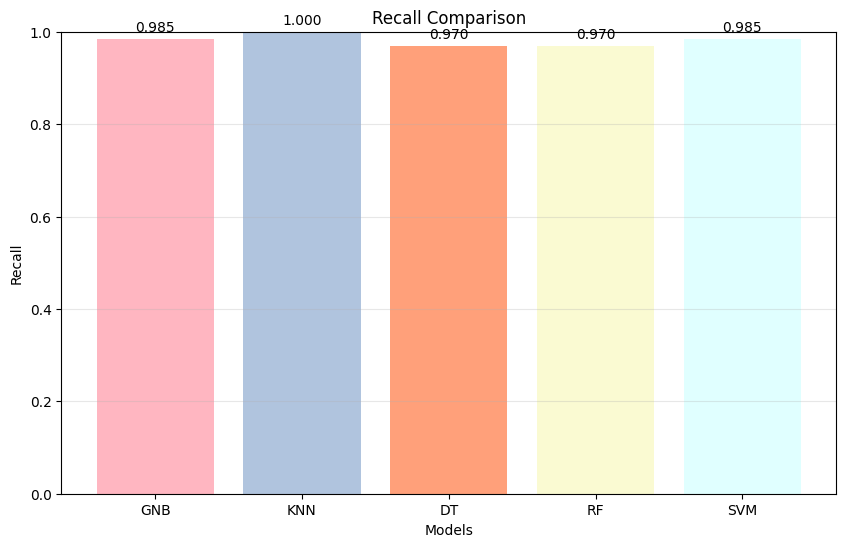

In [29]:
# Recall Comparison
recall_scores = [r_gnb, r_knn, r_dt, r_rf, r_svm]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM']

colors = ['lightpink', 'lightsteelblue', 'lightsalmon', 'lightgoldenrodyellow', 'lightcyan']
plt.figure(figsize=(10, 6))
plt.bar(title, recall_scores, color=colors)
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.xlabel('Models')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1)

# Add recall values on top of bars
for i, v in enumerate(recall_scores):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.show()